### Libraries for statistical test and some plotting

In [1]:
import pandas as pd
import os
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset as NetCDFFile
import xarray as xr
import seaborn as sns

In [2]:
Training = pd.read_csv("../data/Training.csv") # Should be original training dataset used in the same folder

# List of latitude and longitude values
lats = list(set(list(Training["Latitude"])))
lats.sort()
lons = list(set(list(Training["Longitude"])))
lons.sort()

In [3]:
# Compiling all simulations into one

Simulation_files = os.listdir("1-100")
Simulations = pd.DataFrame({"Date": [],
                            "Longitude": [],
                            "Latitude": [],
                            "precipitation": [],
                            "t_min": [],
                            "t_max": [],
                            "wind": [],
                            "Simulation": []})
index = 1

for k in Simulation_files:
    # print(index)
    df = pd.read_csv("1-100/" + k)
    df = df.drop("n_simu", axis = 1)
    df = df.drop("Unnamed: 0", axis = 1)
    df = df.drop("temperature", axis = 1)
    df["Simulation"] = index
    index = index + 1
    Simulations = pd.concat([Simulations, df])

print(Simulations.shape)

(384345000, 8)


In [4]:
# Simulations.to_csv("Simulations_compiled.csv") # Optional, can take a while

In [13]:
# Kolmogorov–Smirnov score heatmap

Variable_name = "t_max"
Month = 1
Date = "2022-" + str(Month)
Date = datetime.strptime(Date, '%Y-%m').date()

K_S_Results = pd.DataFrame({"Date": [],
                            "Lat": [],
                            "Lon": [],
                            "K-S Score": [],
                            "K-S Statistic": []})

# An example that covers ~1/3 of the map
for i in lats[30:100]:
    for j in lons[20:70]:
        print(i, j)
        
        # Observed Data
        Training_ij = Training.loc[(Training["Latitude"] == i) & (Training["Longitude"] == j)]
        Training_ij_M = Training_ij.groupby(pd.PeriodIndex(Training_ij['Date'], freq="M"))[Variable_name].mean()
        Training_ij_M = Training_ij_M.reset_index()

        # Simulated Data
        Simulations_ij = Simulations.loc[(Simulations["Latitude"] == i) & (Simulations["Longitude"] == j)]
        Simulations_ij_M = Simulations_ij.groupby([pd.PeriodIndex(Simulations_ij['Date'], freq="M"), "Simulation"])[Variable_name].mean()
        Simulations_ij_M = Simulations_ij_M.reset_index()

        # Calculating the K-S score for a cell for the given month
        Sample_obs = list(Training_ij_M[Training_ij_M["Date"].dt.month == Month][Variable_name])
        Sample_sim = list(Simulations_ij_M[Simulations_ij_M["Date"].dt.month == Month][Variable_name])
        K_S_Score = stats.ks_2samp(Sample_obs, Sample_sim)
        K_S_ij = pd.DataFrame({"Date": Date,
                            "Lat": i,
                            "Lon": j,
                            "K-S Score": K_S_Score[1],
                            "K-S Statistic": K_S_Score[0]},
                            index = [0]) 
        print(K_S_Score)
        K_S_Results = pd.concat([K_S_Results, K_S_ij])
    
K_S_Results

8.5 95.0
KstestResult(statistic=0.0, pvalue=1.0)
8.5 95.25
KstestResult(statistic=0.0, pvalue=1.0)
8.5 95.5
KstestResult(statistic=0.0, pvalue=1.0)
8.5 95.75
KstestResult(statistic=0.0, pvalue=1.0)
8.5 96.0
KstestResult(statistic=0.0, pvalue=1.0)
8.5 96.25
KstestResult(statistic=0.0, pvalue=1.0)
8.5 96.5
KstestResult(statistic=0.0, pvalue=1.0)
8.5 96.75
KstestResult(statistic=0.0, pvalue=1.0)
8.5 97.0
KstestResult(statistic=0.0, pvalue=1.0)
8.5 97.25
KstestResult(statistic=0.0, pvalue=1.0)
8.5 97.5
KstestResult(statistic=0.0, pvalue=1.0)
8.5 97.75
KstestResult(statistic=0.0, pvalue=1.0)
8.5 98.0
KstestResult(statistic=0.0, pvalue=1.0)
8.5 98.25
KstestResult(statistic=0.0, pvalue=1.0)
8.5 98.5
KstestResult(statistic=0.2723809523809524, pvalue=0.01942580826313382)
8.5 98.75
KstestResult(statistic=0.24333333333333335, pvalue=0.04900023680044909)
8.5 99.0
KstestResult(statistic=0.2733333333333333, pvalue=0.018806830661116738)
8.5 99.25
KstestResult(statistic=0.23952380952380953, pvalue=0.0

,Date,Lat,Lon,K-S Score,K-S Statistic
0,2022-01-01,8.50,95.00,1.000000,0.000000
0,2022-01-01,8.50,95.25,1.000000,0.000000
0,2022-01-01,8.50,95.50,1.000000,0.000000
0,2022-01-01,8.50,95.75,1.000000,0.000000
0,2022-01-01,8.50,96.00,1.000000,0.000000
...,...,...,...,...,...
0,2022-01-01,25.75,106.25,0.150836,0.202381
0,2022-01-01,25.75,106.50,0.116883,0.212381
0,2022-01-01,25.75,106.75,0.210279,0.188571
0,2022-01-01,25.75,107.00,0.133889,0.207143


### Plotting

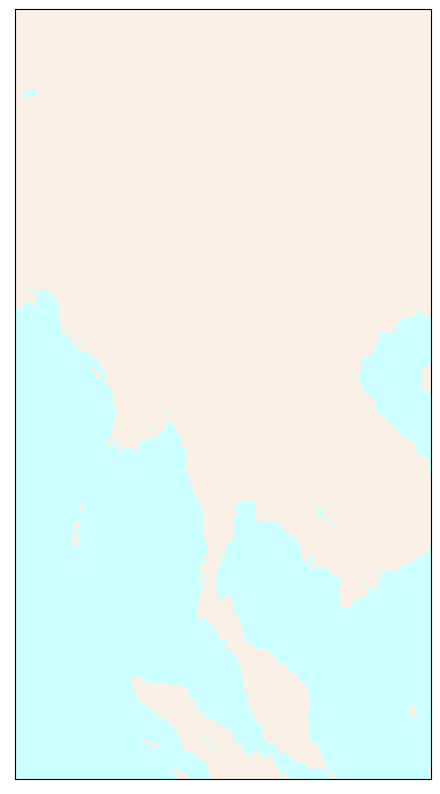

In [14]:
plt.figure(figsize=(15,10))
map = Basemap(projection='merc',llcrnrlon=90.,llcrnrlat=1.,urcrnrlon=109.,urcrnrlat=34.,resolution='i')
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')

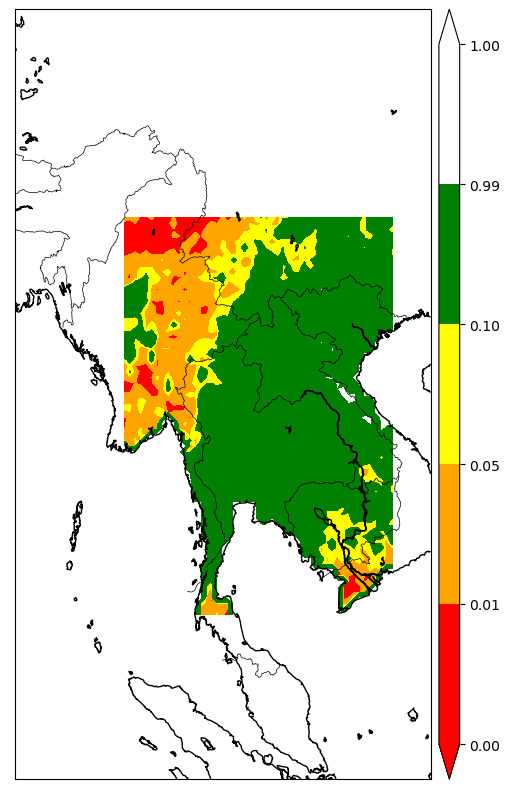

In [22]:
Lons,Lats= np.meshgrid(lons[20:70], lats[30:100])
x,y = map(Lons,Lats)
k_s = np.array(K_S_Results["K-S Score"]).reshape(70,50)

plt.figure(figsize=(15,10))
temp = map.contourf(x,y,k_s, 
                    levels = [0, 0.01, 0.05, 0.1, 0.99, 1], 
                    colors = ['red', 'orange', 'yellow', 'green', 'white'], 
                    extend='both')
cb = map.colorbar(temp,"right", size="5%", pad="2%")
map.drawcoastlines()
map.drawcountries()

### To investigate specific points of interest

In [23]:
# Getting the k-s test result for the specific point

La, Lo = 21.25, 97.75

Training_ij = Training.loc[(Training["Latitude"] == La) & (Training["Longitude"] == Lo)]
Training_ij_M = Training_ij.groupby(pd.PeriodIndex(Training_ij['Date'], freq="M"))[Variable_name].mean()
Training_ij_M = Training_ij_M.reset_index()
a = list(Training_ij_M[Training_ij_M["Date"].dt.month == Month][Variable_name])

Simulations_ij = Simulations.loc[(Simulations["Latitude"] == La) & (Simulations["Longitude"] == Lo)]
Simulations_ij_M = Simulations_ij.groupby([pd.PeriodIndex(Simulations_ij['Date'], freq="M"), "Simulation"])[Variable_name].mean()
Simulations_ij_M = Simulations_ij_M.reset_index()
b = list(Simulations_ij_M[Simulations_ij_M["Date"].dt.month == Month][Variable_name])

stats.ks_2samp(a, b)

KstestResult(statistic=0.2776190476190476, pvalue=0.01630438665309265)

<AxesSubplot:ylabel='Density'>

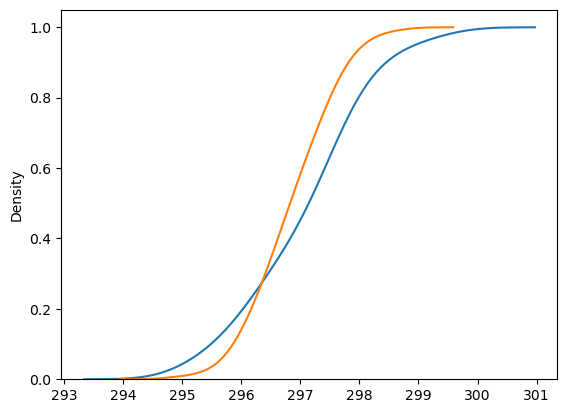

In [26]:
# Plotting ecdf

sns.kdeplot(a, cumulative=True)
sns.kdeplot(b, cumulative=True)